# Problem 3 The Bootstrap Method

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
head=["birth weight", "pregnancy lenght", "first born", "mother's age", "mother's height", "mother's prepregnancy weight", "smoking status"]
data = pd.DataFrame(np.loadtxt("birth.txt"), columns=head )
data.head()

,birth weight,pregnancy lenght,first born,mother's age,mother's height,mother's prepregnancy weight,smoking status
0,120.0,284.0,0.0,27.0,62.0,100.0,0.0
1,113.0,282.0,0.0,33.0,64.0,135.0,0.0
2,128.0,279.0,0.0,28.0,64.0,115.0,1.0
3,123.0,999.0,0.0,36.0,69.0,190.0,0.0
4,108.0,282.0,0.0,23.0,67.0,125.0,1.0


### (a)
The population size $N=1236$

The population mean $\mu$ and population variance $\sigma$ are

$\mu = \frac{1}{N}\sum_{i=1}^{N}x_i = 3.390$

$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i-\mu)^2 = 0.267$

The sample mean and sample variance of an $n=40$ sample set is

$\bar X_n = \frac{1}{n}\sum_{i=1}^{n}X_i = 3.293$

$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i-\bar X_n)^2 = 0.353$

The exact standard error of $\bar X_n$ is given by

$ s[\bar X_n] = \sqrt{\frac{\sigma^2}{n}\left(1-\frac{n-1}{N-1}\right)} = 0.0804$

In [289]:
bwt_population = np.array(data["birth weight"] * 0.0283495)

N = len(bwt_population)
n = 40
mu = bwt_population.mean()
sigma = bwt_population.std()
s_Xbar = np.sqrt(sigma**2/n * (1-(n-1)/(N-1)))

print("population size:", N)
print("population mean:", mu)
print("population variance:", sigma**2)
print("exact standard error:", s_Xbar)

population size: 1236
population mean: 3.38994421642
population variance: 0.267066849709
exact standard error: 0.0804103786395


In [290]:
np.random.seed(42)
bwt_sample = np.random.choice(bwt_population, size=n, replace=False)
X_bar = bwt_sample.mean()
print("sample mean:", X_bar)
print("sample variance:", bwt_sample.var(ddof=1))

sample mean: 3.2935031625
sample variance: 0.353497144159


### (b)
The standard error of $\bar X_n$ estimated from the bootstrap method is

$\hat{\text{se}}_B[\bar X_n] = \sqrt{\frac{1}{B}\sum_{b=1}^{B}{\left(\bar X_n^{(b)}-\frac{1}{B}\sum_{b=1}^{B}{\bar X_n^{(b)}}\right)^2}} =0.0956$

In [291]:
B = 1000
bwt_population_boot = bwt_sample
for i in range(int(N/n)):
    bwt_population_boot = np.append(bwt_population_boot, bwt_sample)

In [292]:
np.random.seed(42)
X_bar_boot = np.array([])
for b in range(B):
    bwt_sample_boot = np.random.choice(bwt_population_boot, size=n, replace=False)
    X_bar_boot = np.append(X_bar_boot, bwt_sample_boot.mean())

In [293]:
print("bootstrap standard error:",X_bar_boot.std())

bootstrap standard error: 0.095564477662


### (c)
$N = k\times n +r$, 

for N=1236 and n=40, k=30 and r=36

The standard error of $\bar X_n$ estimated from the alternative bootstrap method is

$\hat{\text{se}}_{BF}[\bar X_n] = \sqrt{\frac{1}{B}\sum_{b'=1}^{B}{\left(\bar X_n^{(b')}-\frac{1}{B}\sum_{b'=1}^{B}{\bar X_n^{(b')}}\right)^2}} =0.0876$


In [294]:
B = 1000
k = 30
r = 36
bwt_population_altboot1 = bwt_sample
for i in range(k-1):
    bwt_population_altboot1 = np.append(bwt_population_altboot1, bwt_sample)
bwt_population_altboot2 = np.append(bwt_population_altboot1, bwt_sample)

In [295]:
np.random.seed(42)
X_bar_altboot = np.array([])
p = (1 - r/n) * (1 - n/(N-1))
U = np.random.uniform(size=B)
for b in range(B):
    if U[b] < p:
        bwt_sample_altboot = np.random.choice(bwt_population_altboot1, size=n, replace=False)
    else:
        bwt_sample_altboot = np.random.choice(bwt_population_altboot2, size=n, replace=False)
    X_bar_altboot = np.append(X_bar_altboot, bwt_sample_altboot.mean())

In [296]:
print("alternative bootstrap standard error:", X_bar_altboot.std())

alternative bootstrap standard error: 0.0875660767342


### (d)

From the boxplot, both of the estimated standard errors are larger than the exact one. Perhaps this is due to the large sample variance compared to the population variance $(s^2=0.35 \text{ v.s. } \sigma^2=0.27)$ of our $n=40$ sample set.

In [297]:
np.random.seed(42)

se_B = np.array([])
for iteration in range(100):
    bwt_population_boot = bwt_sample
    for i in range(int(N/n)):
        bwt_population_boot = np.append(bwt_population_boot, bwt_sample)
    X_bar_boot = np.array([])
    for b in range(B):
        bwt_sample_boot = np.random.choice(bwt_population_boot, size=n, replace=False)
        X_bar_boot = np.append(X_bar_boot, bwt_sample_boot.mean())
    se_B = np.append(se_B, X_bar_boot.std())

In [298]:
np.random.seed(42)

se_BF = np.array([])
for iteration in range(100):
    bwt_population_altboot1 = bwt_sample
    for i in range(k-1):
        bwt_population_altboot1 = np.append(bwt_population_altboot1, bwt_sample)
    bwt_population_altboot2 = np.append(bwt_population_altboot1, bwt_sample)
    X_bar_altboot = np.array([])
    U = np.random.uniform(size=B)
    for b in range(B):
        if U[b] < p:
            bwt_sample_altboot = np.random.choice(bwt_population_altboot1, size=n, replace=False)
        else:
            bwt_sample_altboot = np.random.choice(bwt_population_altboot2, size=n, replace=False)
        X_bar_altboot = np.append(X_bar_altboot, bwt_sample_altboot.mean())
    se_BF = np.append(se_BF, X_bar_altboot.std())

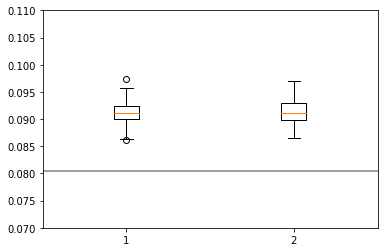

In [299]:
plt.boxplot([se_B, se_BF],)
plt.plot([-4,4],[0.0804, 0.0804],c="grey")
plt.ylim(ymin=0.07, ymax=0.11)
plt.show()

Left: standard error estimated from the oringinal bootstrap method,   

Right: standard error estimated from the alternative bootstrap method,   

Grey line: exact standard error.